**Laboratorio de métodos computacionales**

**Universidad de los Andes**

**Profesor: Diego Alberto Castro Rodríguez**

## Generación de números aleatorios, método GLC

Un generador lineal congruencial (GLC) es un algoritmo que permite obtener una secuencia de números pseudoaleatorios calculados con una función lineal definida a trozos discontinua

$$r = (ar_0+c)\,\text{mod}\,M$$

36532


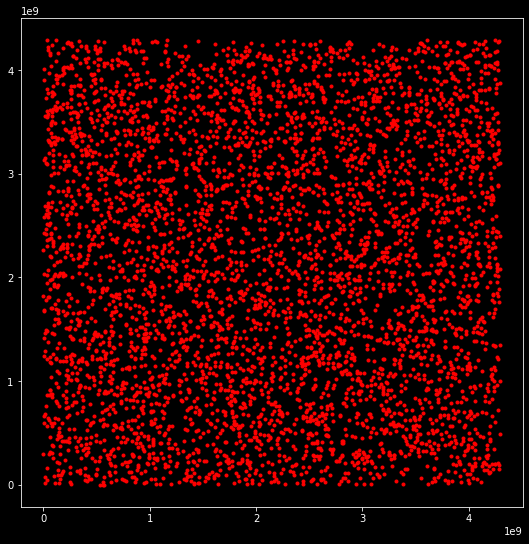

In [1]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

def seudoAleatorio(a, r0, c, M):
  return (a*r0 + c) % M

def listaAleatoria(a, r0, c, M, L):
  rands = []
  for i in range(L):
    r = seudoAleatorio(a, r0, c, M)
    rands.append(r)
    r0 = r
  return rands

lista = listaAleatoria(8121, 1, 28411, 2**32, 10000)
x = lista[0::2]
y = lista[1::2]
print(min(lista))
plt.figure(figsize=(9,9))
plt.plot(x,y,'ro', markersize=3)
plt.show()

## Estimación del valor de $\pi$ madiante el método de Montecarlo

El área de un cuadrado de lado $2r$ es:
$$A_{\text{cuadrado}} = (2r)(2r)= 4r^2\,\,\,\,\rightarrow \,\,\,\,r^2 = \frac{A_{\text{cuadrado}}}{4}$$

El área de un círculo es

$$ A_{\text{círculo}} = \pi r^2\,\,\,\,\rightarrow\,\,\,\,\pi = \frac{A_{\text{círculo}}}{r^2} = \frac{4A_{\text{círculo}}}{A_{\text{cuadrado}}}$$

al realizar lanzamientos de, supongamos granos, sobre el cuadrado con una probabilidad idéntica para cada punto sobre el cuadrado, podemos aproximar el valor de $\pi$ como:

$$\pi \approx \frac{4\times({\text{# de granos dentro del círculo}})}{\text{# de granos dentro del cuadrado}}$$


3.14268

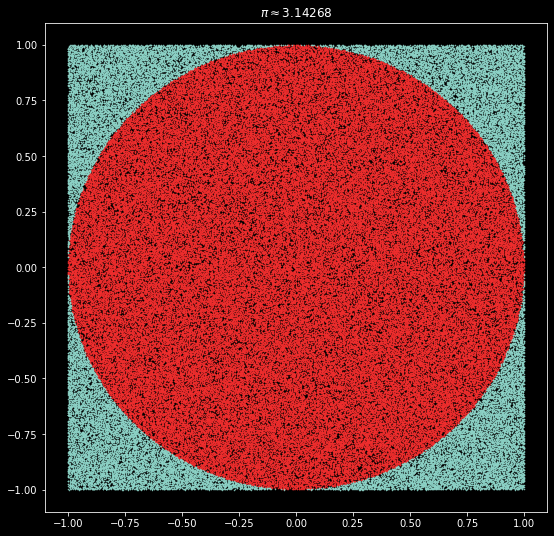

In [2]:
import numpy as np

granos = 200000

def pi_montecarlo(granos, draw = False):
  x, y = 2*np.random.rand(2, granos)-1
  C = x**2+y**2 < 1
  pi = 4 * sum(C) / granos
  if draw: dibujar_granos(pi, x, y, C)
  return pi

def dibujar_granos(pi, x, y, C):
  plt.figure(figsize=(9,9))
  plt.title(r'$\pi \approx $'+ str(pi))
  plt.plot(x[C],y[C],'o',color='#f02e2e',markersize = 0.5)
  plt.plot(x[~C],y[~C],'o',markersize = 0.5)

pi_montecarlo(granos, True)

## Simulación de lanzamiento de dados

350.02885
val más frecuente 350.02885


(350.02885, 17.01588133707743)

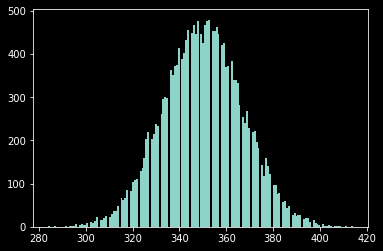

In [7]:
from scipy.stats import norm

num_dados = 100
repeticiones = 20000

def simular_lanzamientos(num_dados, repeticiones):
  resultados = np.random.randint(6, size=(num_dados, repeticiones))+1
  return np.sum(resultados, axis=0)

def ajuste_gaussiano_normalizado(valores):
  mu, std = norm.fit(valores)
  print('val más frecuente', mu)
  return mu, std

sumas = simular_lanzamientos(num_dados, repeticiones)
plt.hist(sumas,bins=160)
print(np.mean(sumas))
ajuste_gaussiano_normalizado(sumas)

## Integración de Montecarlo en una dimensión

$$\int^b_a\! f(x)dx = \lim_{n\to\infty}\frac{b-a}{n}\sum^n_{i=1}\! f(u_i(b-a)+a)$$

$$\int^b_a\! f(x)dx \simeq \frac{b-a}{n}\sum^n_{i=1}\! f(u_i(b-a)+a)$$

Donde cada $u_i$ es un número aleatorio distinto en el intervalo $[0, 1]$



In [4]:
a = 0
b = 10
n = 11

def f(x):
  return x**2

def integracion_de_montecarlo(f,a,b,n):
  u = np.random.rand(n)
  return sum(f(u*(b - a) + a))*(b - a) / n

integracion_de_montecarlo(f,a,b,n)

359.924948223268

## Integración de Montecarlo en N dimensiones

$$\int^{b_1}_{a_1}\cdots\int^{b_2}_{a_2}\! f(x_1,\dots,x_n)dx_1\dots dx_n \simeq \frac{(b_1-a_1)\dots (b_n-a_n)}{N_1\dots N_n}\sum^{N_1}_{i_1=1}\cdots \sum^{N_n}_{i_n=1}\! f(w_1,\dots,w_j,\dots,w_n)$$

Donde $w_j = u_{ij}(b_j-a_j) + a_j$

In [10]:
import numpy as np
from types import SimpleNamespace

def fun(x,y):
  return np.exp(-(x**2+y**2))

def integracion_de_montecarlo_2d(f,ls,m):
  l = SimpleNamespace(**ls)
  wx = np.random.rand(m)*(l.b1 - l.a1)+ l.a1
  wy = np.random.rand(m)*(l.b2 - l.a2)+ l.a2
  return sum(f(wx,wy))*(l.b1 - l.a1)*(l.b2 - l.a2)/m

m = 1000000
ls = {'a1':-3, 'b1':4, 'a2':-2, 'b2':6}

integracion_de_montecarlo_2d(fun,ls,m)

3.14313226037264